## SUPERVISED-CLASSIFICATION-PROJECT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 

In [2]:
from sklearn.datasets import load_iris 

In [4]:
iris = load_iris()


In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [7]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target'] = pd.DataFrame(iris.target)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
def func(row):
    if row['target'] == 0:
        return 'setosa'
    elif row['target'] == 1:
        return 'versicolor'
    else:
        return 'virginica'
df['target_names'] = df.apply(func, axis=1)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

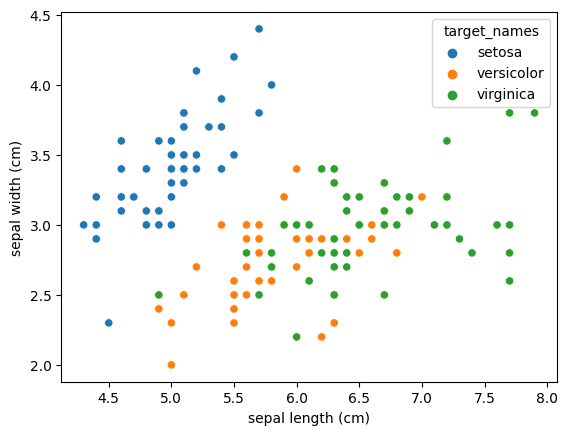

In [14]:
sns.scatterplot(x = df['sepal length (cm)'], y = df['sepal width (cm)'], hue = df.target_names )

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

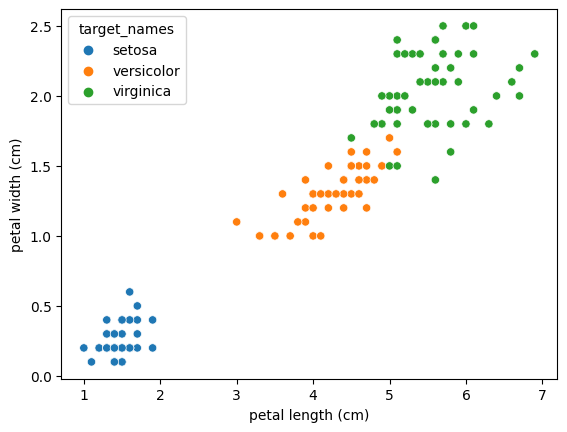

In [16]:
sns.scatterplot(x = df['petal length (cm)'], y = df['petal width (cm)'], hue =df.target_names )

## Building model

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [20]:
X = iris.data
y = iris.target


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [22]:
dc = DecisionTreeClassifier()
rc = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
classifiers = { 'DecisionTreeClassifier' : dc, 'RandomForestClassifier' : rc,'svm' : svm, 'knn' : knn }

In [24]:
print('Accuracy Score \n')
for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f'{classifier_name} : {score*100}')

Accuracy Score 

DecisionTreeClassifier : 91.11111111111111
RandomForestClassifier : 91.11111111111111
svm : 93.33333333333333
knn : 93.33333333333333


In [26]:
print('Classification Report \n')
for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{classifier_name} \n\n {report}')

Classification Report 

DecisionTreeClassifier 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.88      0.88        16
           2       0.86      0.86      0.86        14

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

RandomForestClassifier 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

svm 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91   

### In summary, all four classifiers show relatively good performance, with SVM achieving the highest accuracy and balanced precision, recall, and F1-score for all classes.


In [27]:
parameters = {
'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
'gamma' : ['scale', 'auto']
}



In [28]:
gridsearch = GridSearchCV(svm, parameters)
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_estimator = gridsearch.best_estimator_
test_score = best_estimator.score(X_test, y_test)


In [29]:
best_params, test_score

({'gamma': 'scale', 'kernel': 'linear'}, 1.0)

In [30]:
model = SVC()
model.fit(X_train, y_train)

SVC()

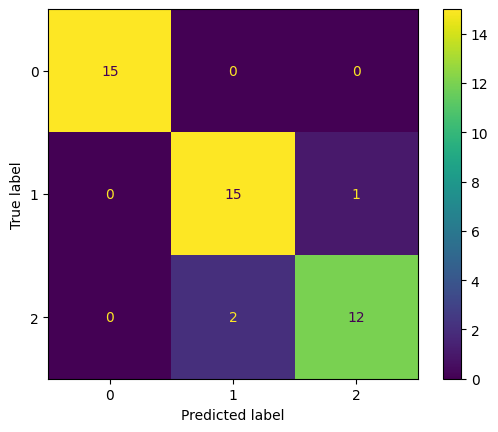

In [31]:
y_pred = model.predict(X_test)
cm= confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [32]:
model.predict([[5.5, 2.6, 4.4, 1.2]])

array([1])

In [33]:
model.predict([[7.9, 3.8, 6.4, 2. ]])

array([2])

## Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB



In [35]:
gnb = GaussianNB()

In [36]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9777777777777777

##  K-Means

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


[KMeans(n_clusters=1, n_init=10), KMeans(n_clusters=2, n_init=10), KMeans(n_clusters=3, n_init=10), KMeans(n_clusters=4, n_init=10), KMeans(n_clusters=5, n_init=10), KMeans(n_clusters=6, n_init=10), KMeans(n_clusters=7, n_init=10), KMeans(n_init=10), KMeans(n_clusters=9, n_init=10), KMeans(n_clusters=10, n_init=10), KMeans(n_clusters=11, n_init=10), KMeans(n_clusters=12, n_init=10), KMeans(n_clusters=13, n_init=10), KMeans(n_clusters=14, n_init=10), KMeans(n_clusters=15, n_init=10), KMeans(n_clusters=16, n_init=10), KMeans(n_clusters=17, n_init=10), KMeans(n_clusters=18, n_init=10), KMeans(n_clusters=19, n_init=10)]


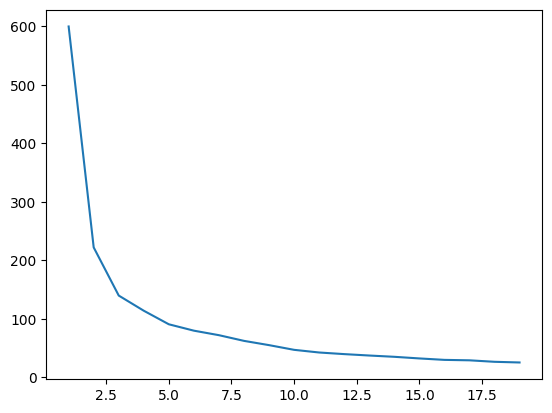

In [39]:
i = range(1,20)
km = [KMeans(n_clusters = i, n_init=10) for i in i]
print(km)
score = [km[i].fit(X_scaled).inertia_ for i in range(len(km))]
plt.plot(i, score)

In [40]:
model_km = KMeans(n_clusters = 3, n_init=10)
model_km.fit(X_scaled)
silhouette_score(X, model_km.labels_)

0.5061527484935539

In [41]:
model_km.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [42]:
 model_km.cluster_centers_


array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

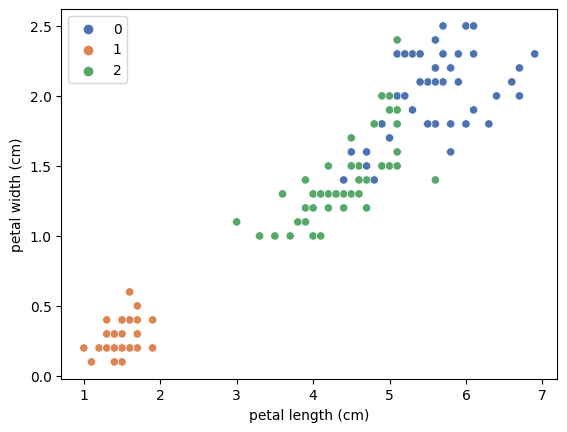

In [44]:
sns.scatterplot(x = df['petal length (cm)'], y = df['petal width (cm)'], hue =model_km.labels_, palette = 'deep')